<a href="https://colab.research.google.com/github/brunonma/analisededados/blob/main/Trabalhando_com_DATAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel ("Salvador.xlsx")

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df ["Data"] = df["Data"].astype("int64")

In [ ]:
 df.dtypes

Cidade     object
Data        int64
Vendas    float64
LojaID      int64
Qtde        int64
dtype: object

In [ ]:
#transformando coluna de data em data
df ["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
df["Receita"] = df ["Vendas"].mul(df["Qtde"])

In [ ]:
#agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#criando uma nnova coluna com o ano
df["Ano_venda"] = df ["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda
201,Natal,2019-01-02,86.61,1036,1,86.61,2019
81,Salvador,2019-01-01,17.36,1037,2,34.72,2019
239,Salvador,2019-01-03,161.41,1037,3,484.23,2019
187,Salvador,2019-01-02,3.85,1035,3,11.55,2019
139,Fortaleza,2019-03-02,141.16,980,7,988.12,2019


In [ ]:
#extraindo o mês e o dia
df["mes_venda"], df ["dia_venda"] = (df["Data"].dt.month,df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda
31,Natal,2018-04-03,401.00,854,4,1604.00,2018,4,3
147,Salvador,2019-01-02,34.50,1035,1,34.50,2019,1,2
102,Aracaju,2018-01-01,7.29,1523,1,7.29,2018,1,1
5,Fortaleza,2019-01-01,37.30,1002,5,186.50,2019,1,1
134,Recife,2019-03-02,195.18,980,5,975.90,2019,3,2


In [ ]:
#retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#calculando difereça de dias 
df["diferenca_dias"] = df["Data"]-df["Data"].min()

In [ ]:
df.sample(5)


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias
100,Fortaleza,2019-01-01,18.58,1003,1,18.58,2019,1,1,365 days
31,Fortaleza,2019-01-01,23.46,1002,4,93.84,2019,1,1,365 days
188,Salvador,2019-01-02,178.11,1035,3,534.33,2019,1,2,366 days
11,Salvador,2019-01-01,30.62,1034,3,91.86,2019,1,1,365 days
87,Fortaleza,2019-01-01,42.04,1002,5,210.20,2019,1,1,365 days


In [ ]:
#criando a coluna de trimestre
df ["trimestre_venda"] = df ["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
43,Fortaleza,2019-01-01,191.52,1004,1,191.52,2019,1,1,365 days,1
211,Natal,2019-01-02,141.05,1035,3,423.15,2019,1,2,366 days,1
86,Recife,2019-01-01,17.83,982,8,142.64,2019,1,1,365 days,1
8,Natal,2019-03-27,667.00,852,4,2668.00,2019,3,27,450 days,1
65,Fortaleza,2019-01-01,145.20,1005,2,290.40,2019,1,1,365 days,1


In [ ]:
#filtrando as vendas de 2019 do mês março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019)&(df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
32,Natal,2019-03-17,244.00,854,2,488.00,2019,3,17,440 days,1
82,Natal,2019-03-07,868.00,854,3,2604.00,2019,3,7,430 days,1
2,Natal,2019-03-11,308.00,852,3,924.00,2019,3,11,434 days,1
141,Recife,2019-03-02,182.75,983,8,1462.00,2019,3,2,425 days,1
138,Recife,2019-03-02,150.38,983,6,902.28,2019,3,2,425 days,1
132,Salvador,2019-03-02,19.61,1036,2,39.22,2019,3,2,425 days,1
4,Natal,2019-03-09,699.00,853,3,2097.00,2019,3,9,432 days,1
120,Fortaleza,2019-03-02,184.90,982,4,739.60,2019,3,2,425 days,1
140,Fortaleza,2019-03-02,166.89,983,5,834.45,2019,3,2,425 days,1
108,Salvador,2019-03-02,11.72,1037,1,11.72,2019,3,2,425 days,1


In [ ]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

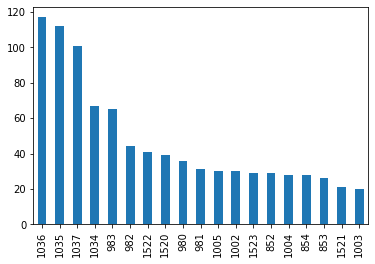

In [ ]:
#grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

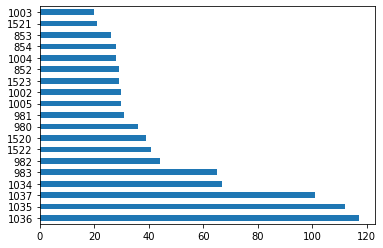

In [ ]:
df["LojaID"].value_counts().plot.barh()

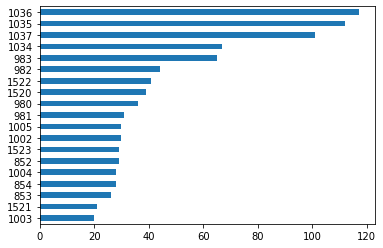

In [ ]:
#grafico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

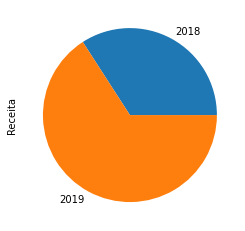

In [ ]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#total de vendas por cidade 
df["Cidade"].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

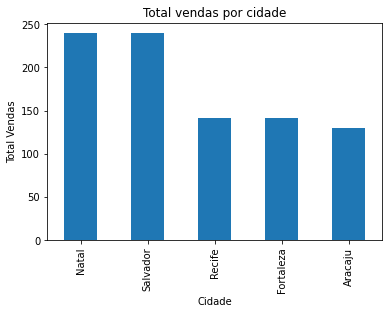

In [ ]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

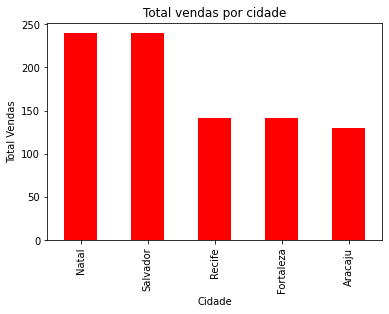

In [ ]:
#alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade",color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
#Alterando o estilo
plt.style.use("ggplot")

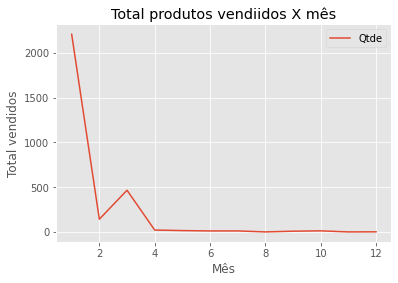

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total produtos vendiidos X mês")
plt.xlabel("Mês")
plt.ylabel("Total vendidos");
plt.legend();

In [ ]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_venda"] == 2019]

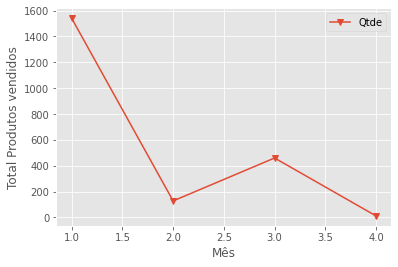

In [ ]:
#total de produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend();

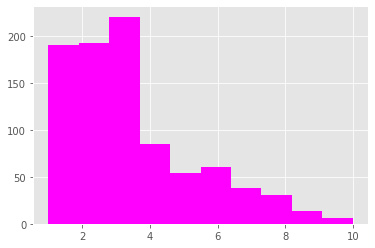

In [ ]:
#histograma
plt.hist(df["Qtde"], color="magenta");

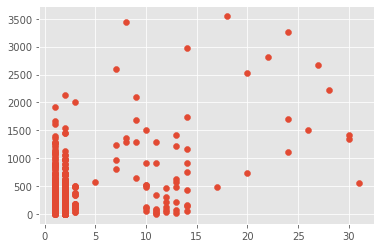

In [ ]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);


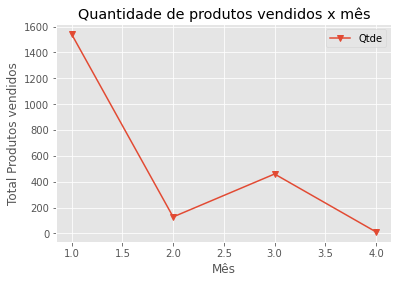

In [ ]:
#salavando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend()
plt.savefig("grafico QTDE X MES.png")

# Nova seção